# GOAL :
1. angka kemiskinan di Indonesia 5 tahun terakhir pemetaan wilayah/persentase grafik pertumbuhan/penurunan kemiskinan 
2. angka pengangguran di Indonesia 5 tahun terakhir pemetaan wilayah/persentase grafik pertumbuhan/penurunan pengangguran 
3. angka siswa putus sekolah di Indonesia 5 tahun terakhir pemetaan wilayah/persentase grafik pertumbuhan/penurunan pendidikan 
4. angka kelaparan di Indonesia 5 tahun terakhir pemetaan wilayah/persentase grafik pertumbuhan/penurunan kelaparan di Indonesia`

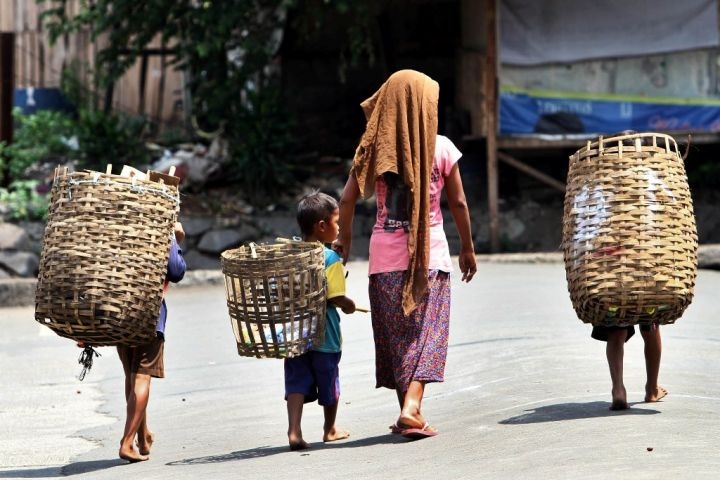

# Garis Kemiskinan 
Garis kemiskinan adalah ukuran atau batas yang digunakan untuk menentukan tingkat kemiskinan dalam suatu populasi atau masyarakat. Ini adalah nilai atau ambang batas di bawahnya seseorang dianggap sebagai individu atau rumah tangga yang hidup dalam kondisi kemiskinan.

Garis kemiskinan digunakan untuk mengukur dan memantau tingkat kemiskinan dalam suatu populasi serta mengidentifikasi individu atau kelompok yang membutuhkan bantuan atau program kesejahteraan sosial. Representasi dari garis kemiskinan berfungsi sebagai alat untuk mengukur tingkat kesetaraan, ketimpangan, dan kesejahteraan masyarakat.

# Indeks Kedalaman Kemiskinan:

Representasi Kedalaman Kemiskinan: Indeks kedalaman kemiskinan mengukur seberapa dalam atau seberapa jauh individu-individu yang hidup di bawah garis kemiskinan berada di bawah ambang batas tersebut. Ini memberikan informasi tentang tingkat kesenjangan atau kedalaman kemiskinan bagi individu-individu yang hidup di bawah garis kemiskinan.

Informasi Tentang Tingkat Kedalaman Kemiskinan: Indeks kedalaman kemiskinan memberikan gambaran tentang sejauh mana kondisi kemiskinan bagi mereka yang berada di bawah garis kemiskinan. Semakin tinggi indeks kedalaman kemiskinan, semakin besar juga kesenjangan atau ketimpangan di antara individu-individu yang miskin.

# Dataset

In [45]:
import pandas as pd

# membaca dataset
angka_kemiskinan = pd.read_csv('Kemiskinan per Kota 2022-2024.csv')


angka_kemiskinan.head()

,Nama Wilayah,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Persentase Penduduk Miskin (P0) Menurut Kabupa...,NaN,NaN
1,NaN,2022,2023,2024
2,ACEH,14.64,14.45,14.23
3,Simeulue,18.37,17.92,17.69
4,Aceh Singkil,19.18,19.15,19.06


In [46]:
# Mendefinisikan nama baru untuk header
kolom = ['Nama Wilayah', '2022', '2023', '2024']

# Mengubah nama header pada DataFrame
angka_kemiskinan.columns = kolom
angka_kemiskinan = angka_kemiskinan.drop([0, 1])


In [47]:
angka_kemiskinan.head()

,Nama Wilayah,2022,2023,2024
2,ACEH,14.64,14.45,14.23
3,Simeulue,18.37,17.92,17.69
4,Aceh Singkil,19.18,19.15,19.06
5,Aceh Selatan,12.43,12.1,12.02
6,Aceh Tenggara,12.83,12.45,11.99


In [48]:
angka_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 2 to 579
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nama Wilayah  578 non-null    object
 1   2022          578 non-null    object
 2   2023          578 non-null    object
 3   2024          578 non-null    object
dtypes: object(4)
memory usage: 18.2+ KB


In [49]:
import numpy as np

# Ubah kolom tahun menjadi integer
kolom_tahun = ['2022', '2023', '2024']
for kolom in kolom_tahun:
    angka_kemiskinan[kolom] = pd.to_numeric(angka_kemiskinan[kolom], errors='coerce')

angka_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 2 to 579
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nama Wilayah  578 non-null    object 
 1   2022          548 non-null    float64
 2   2023          548 non-null    float64
 3   2024          552 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.2+ KB


In [50]:
angka_kemiskinan.isnull().sum()

Nama Wilayah     0
2022            30
2023            30
2024            26
dtype: int64

In [51]:
angka_kemiskinan.dropna(inplace=True)

angka_kemiskinan.isnull().sum()

Nama Wilayah    0
2022            0
2023            0
2024            0
dtype: int64

# Visualisasi

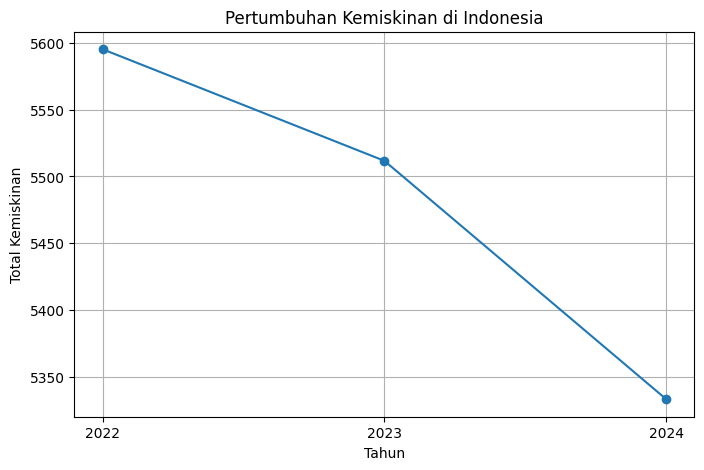

In [52]:
## Grafik Pertumbuhan

import matplotlib.pyplot as plt

# Hitung total kemiskinan per tahun
total_per_tahun = angka_kemiskinan[['2022', '2023', '2024']].sum()

# Buat grafik pertumbuhan
plt.figure(figsize=(8, 5))
plt.plot(total_per_tahun.index, total_per_tahun.values, marker='o', linestyle='-')

# Tambahkan label
plt.xlabel('Tahun')
plt.ylabel('Total Kemiskinan')
plt.title('Pertumbuhan Kemiskinan di Indonesia')
plt.grid(True)
plt.show()

In [53]:
angka_kemiskinan.head()

,Nama Wilayah,2022,2023,2024
2,ACEH,14.64,14.45,14.23
3,Simeulue,18.37,17.92,17.69
4,Aceh Singkil,19.18,19.15,19.06
5,Aceh Selatan,12.43,12.10,12.02
6,Aceh Tenggara,12.83,12.45,11.99


In [54]:
# Hitung rata-rata dan ganti ke satu kolom "2022-2024"
angka_kemiskinan['2022-2024'] = angka_kemiskinan[['2022', '2023', '2024']].mean(axis=1).round(2)


angka_kemiskinan = angka_kemiskinan[['Nama Wilayah','2022-2024']]
angka_kemiskinan

,Nama Wilayah,2022-2024
2,ACEH,14.44
3,Simeulue,17.99
4,Aceh Singkil,19.13
5,Aceh Selatan,12.18
6,Aceh Tenggara,12.42
...,...,...
544,Keerom,15.76
545,Waropen,29.74
546,Supiori,37.47
547,Mamberamo Raya,30.22


In [69]:
import geopandas as gpd
import seaborn as sns

# Load SHP
peta_indonesia = gpd.read_file('BATAS KABUPATEN KOTA DESEMBER 2019 DUKCAPIL/BATAS KABUPATEN KOTA DESEMBER 2019 DUKCAPIL.shp')

# Standarisasi nama wilayah
peta_indonesia['KAB_KOTA'] = peta_indonesia['KAB_KOTA'].str.upper().str.strip()
angka_kemiskinan.loc[:, 'Nama Wilayah'] = angka_kemiskinan['Nama Wilayah'].str.upper().str.strip()

# Merge data berdasarkan kabupaten/kota
peta_kemiskinan = peta_indonesia.merge(angka_kemiskinan, left_on='KAB_KOTA', right_on='Nama Wilayah', how='left')

# Cek wilayah yang tidak terhubung
missing = angka_kemiskinan[~angka_kemiskinan['Nama Wilayah'].isin(peta_kemiskinan['KAB_KOTA'])]
print("Wilayah tidak ditemukan di SHP:\n", missing)

Wilayah tidak ditemukan di SHP:
              Nama Wilayah  2022-2024
2                    ACEH      14.44
26         SUMATERA UTARA       8.19
33           LABUHAN BATU       8.03
48   LABUHAN BATU SELATAN       7.96
49     LABUHAN BATU UTARA       9.05
..                    ...        ...
476        SULAWESI BARAT      11.48
483                MALUKU      16.15
495          MALUKU UTARA       6.34
506           PAPUA BARAT      21.16
527                 PAPUA      23.28

[61 rows x 2 columns]


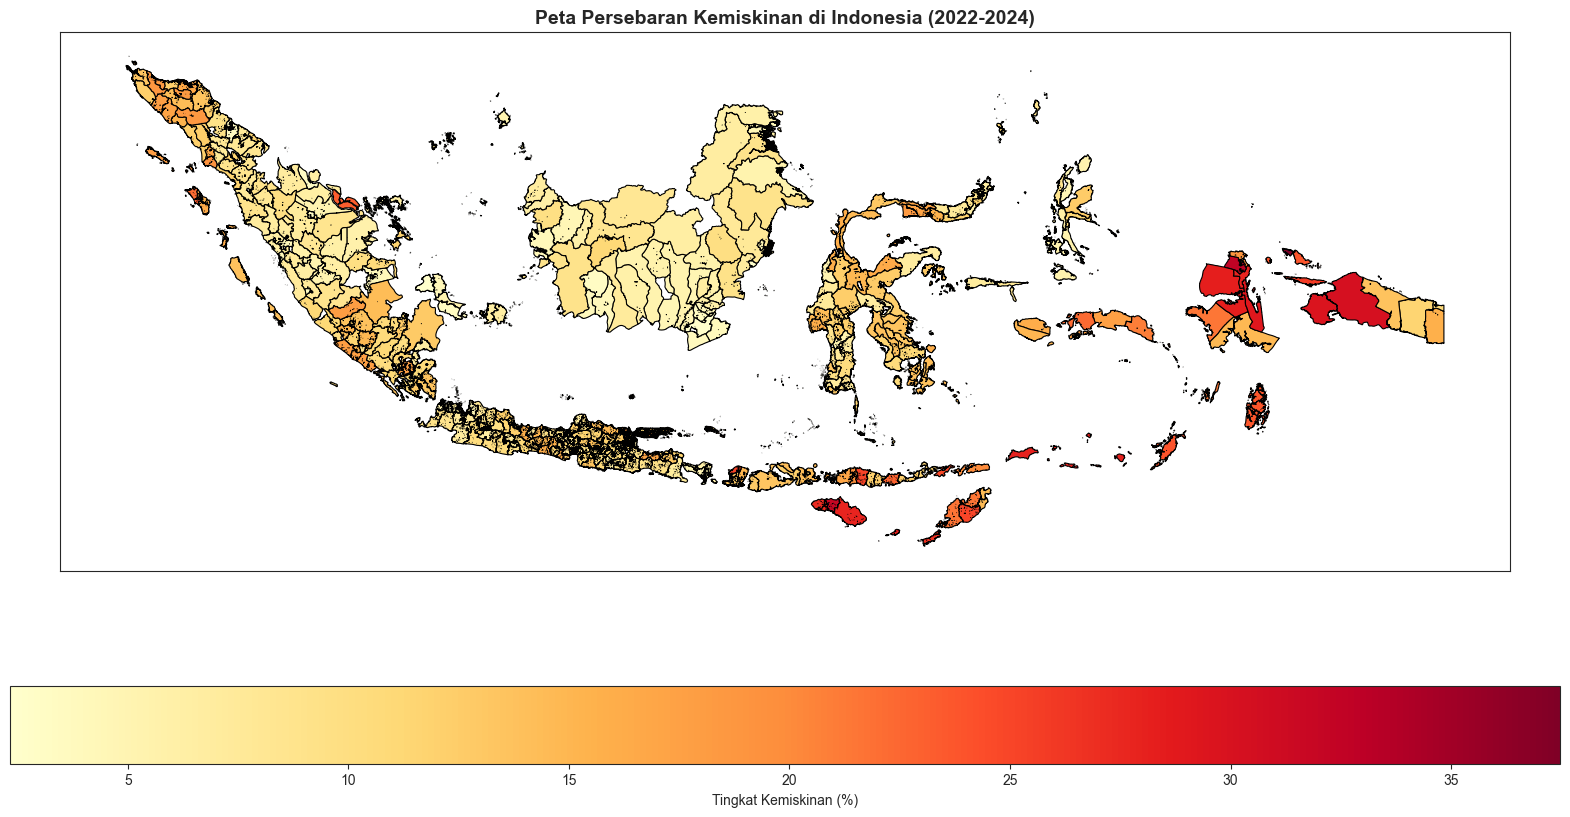

In [66]:
# Buat figure dan axis
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot peta dengan warna berdasarkan tingkat kemiskinan
peta_kemiskinan.plot(column='2022-2024', cmap='YlOrRd', linewidth=0.8, edgecolor='black',
                      legend=True, ax=ax, legend_kwds={'label': "Tingkat Kemiskinan (%)",
                                                       'orientation': "horizontal"})

# Hapus sumbu
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Peta Persebaran Kemiskinan di Indonesia (2022-2024)", fontsize=14, fontweight="bold")

# Tampilkan plot
plt.show()